In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
from ipywidgets import interact
from collections import Counter

In [2]:
## reading the file
data = pd.read_csv(r"C:\Users\USER\OneDrive\Desktop\database\CarPrice_Assignment.csv")

In [3]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
## checking shape
data.shape

(205, 26)

In [5]:
## checking info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
## dropping car_ID as it is of new use
data.drop("car_ID", axis=1, inplace = True)

In [7]:
## checking unique CarName
data['CarName'].unique()
## or
## pd.unique(data['CarName'])

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [8]:
## separating brand from CarName
data['CarName'] = data['CarName'].apply(lambda x: x.split(' ')[0])

In [9]:
## checking if brand separated from car name or not?
pd.unique(data['CarName'])

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

##### Note:
- mazda and maxda are same i.e. its mazda
- Nissan and nissan are same
- porcshce and porsche are same
- toyouta and toyota are same
- vokswagen and volkswagen and vw are same

In [10]:
data['CarName']= data['CarName'].replace({'maxda' : 'mazda', 'Nissan':'nissan','porcshce': 'porsche','toyouta': 'toyota',
                                        'vokswagen':'volkswagen', 'vw':'volkswagen'})

In [11]:
pd.unique(data['CarName'])

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [12]:
## checking number unique values in each column/feature
for col in data.columns:
    print(f'{col} : {len(pd.unique(data[col]))}')

symboling : 6
CarName : 22
fueltype : 2
aspiration : 2
doornumber : 2
carbody : 5
drivewheel : 3
enginelocation : 2
wheelbase : 53
carlength : 75
carwidth : 44
carheight : 49
curbweight : 171
enginetype : 7
cylindernumber : 7
enginesize : 44
fuelsystem : 8
boreratio : 38
stroke : 37
compressionratio : 32
horsepower : 59
peakrpm : 23
citympg : 29
highwaympg : 30
price : 189


In [13]:
## separating categorical and numerical data
cat = data.select_dtypes('O').columns
num = [col for col in data.columns if col not in cat]

In [14]:
cat

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')

In [15]:
num

['symboling',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

### Categorical EDA

In [16]:
temp = pd.DataFrame(data['CarName'].value_counts()).reset_index().rename(columns = {'index':'CarName', 'CarName': 'Count'})

In [17]:
temp

,CarName,Count
0,toyota,32
1,nissan,18
2,mazda,17
3,mitsubishi,13
4,honda,13
5,volkswagen,12
6,subaru,12
7,volvo,11
8,peugeot,11
9,dodge,9


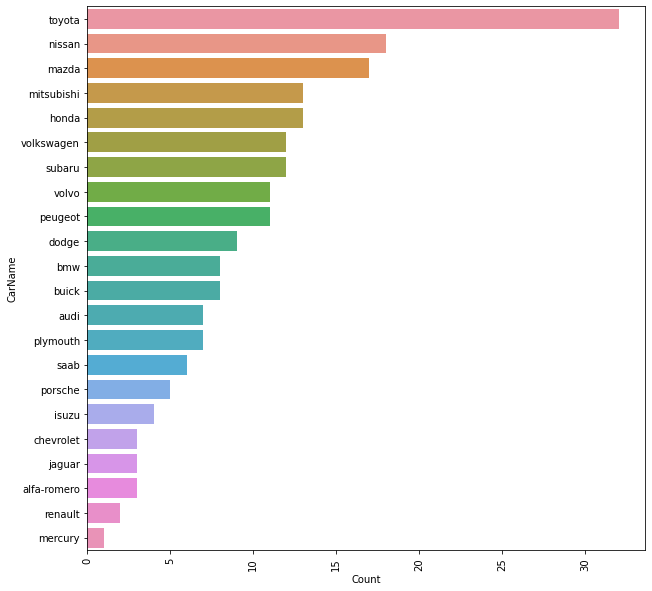

In [18]:
plt.figure(figsize=(10,10))
sns.barplot(y='CarName', x= 'Count', data=temp)
plt.xticks(rotation = 90)
plt.show()

#### 
- Toyata is most used car
- Mercury is least used

<AxesSubplot:xlabel='price', ylabel='Count'>

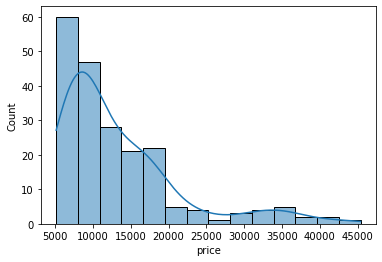

In [19]:
## distribution of car price
sns.histplot(x='price', data=data, kde=True)

#### 
- maximum number of cars lie within the range of 5000-20000
- graph is positively or right skewed

In [23]:
def uni(var1, var2 = 'price'):
    sns.set_theme(style="whitegrid")
    fig,ax = plt.subplots(1,2, figsize = (20,4))
    td = dict(Counter(data[var1]))
    sns.barplot(x = list(td.keys()), y = list(td.values()), data = data, ax=ax[0])
    sns.boxplot(x = var1, y = var2, data = data, ax=ax[1])
    td = dict(Counter(data[var1]))
    plt.title(var1)
    plt.show()

interact(uni,var1=cat, var2=num)

interactive(children=(Dropdown(description='var1', options=('CarName', 'fueltype', 'aspiration', 'doornumber',…

<function __main__.uni(var1, var2='price')>

#### Analysis from above graphs

#### Symboling vs price
- Most of the car have zero symboling.
- Median price of car with -1 symboling is higher when compared to others.
- Price of car with zero symboling covers maximum of all range i.e. starting from 6000 approx to going 30000 approx with outliers covering range upto 40000 approx

#### Fueltype vs price
- count of cars with gas fueltype is more than 175 whereas count of diesel fueltype is 20  
- 90% of cars have gas fueltype.
- Median price of diesel fueltype is much higher than gas and gas fueltype has many outliers.

#### Aspiration vs price
- count of cars with std aspiration is approx 160 & more whereas that of turbo is 35 approx 
- 82% of cars have std aspiration.
- Median price of turbo is higher than std aspiration and std aspiration has presence of outliers.

#### Door Number vs price
- 90 cars have 2 doors and 110 cars approx have 4 doors 
- 82% of cars have 4 doors and 45% cars have 2 doors.
- very slight difference in median price between car with 2 doors and car with 4 doors. outliers are seen in both case.

#### Car Body vs price
- Sedan cars are approx 95 and most preferred as compared to other body type 
- 45-48% cars have sedan body type and 30-35% have hatchback body type.
- Hatchback cars are in total 70 and is 2nd most preferred carbody.
- Wagon cars are approx 25.
- Hardtop and convertible are least preferred carbody type with count of less than 10.
- Median Price of Car with Hardtop body are high followed by convertiblne and sedan. 
- Sedan shows presence of outliers.
- Hatchback and wagon carbody types are available below 20000 with very few outliers.

#### Drivewheel vs price
- Count of cars with fwd drivewheel is 120, rwd is 75 and 4wd is less than 10 
- 58% of cars have fwd drivewheel and approx 35% have rwd drivewheel.
- Median Price of cars with rwd drievwheel is very high as compared to others.

#### Engine Location vs price
- Almost all cars have engine in front.
- Median price of car with rear engine is high and its price range is b/w 33,000 - 47,000.

#### Engine Type vs price
- Cars with ohc engine type have above 140 count whereas other enginetype has count less than 20.
- 70% of cars have ohc engine type
- Most expensive car is with ohcv engint type followed by ohc and dohc.

#### Cylinder Number vs price
- Cars with 4 cylinder number are very common.
- 80% of cars have 4 cylinder number.
- Cars with 8 cylinder have highest price followed by 6, 12 and 5 cylinder number.

#### Fuel System vs price
- Cars with mpfi and 2bbl fuelsystem are more common.
- 46% of the cars use mpfi fuelsystem followed by 2bbl 32%
- Least number of cars having fuel system mfi and spfi
- Median Price range are high of cars having idi fuel system followed by mpfi fuelsystem

### Numerical EDA

In [24]:
def numeric (var1,var2='price'):
    sns.set_theme(style="whitegrid")
    plt.figure(figsize=(8,5))
    sns.scatterplot(x=var1,y=var2,data=data)
    plt.show()
    
interact(numeric,var1=num,var2=num)

interactive(children=(Dropdown(description='var1', options=('symboling', 'wheelbase', 'carlength', 'carwidth',…

<function __main__.numeric(var1, var2='price')>

#### #### Analysis from above graphs

#### wheelbase vs price
- Highly scattered points

#### carlength vs price
- Scattered but not as high as wheelbase

#### carwidth vs price
- bit of linear relation can be seen 

#### curbweight vs price
- initially price is increasing as curbweight increases
- points are scattered after curbweight of 2900

#### enginesize vs price
- points are scattered after enginesize 130

#### boreratio vs price
- scattered from 3.2 and no specific relation

#### stroke vs price
- very weak correlation with price

#### compression ratio vs price
- have no relation with price

#### horsepower vs price
- till 150 points are not scattered 
- price increases with horsepower

#### peakrpm vs price
- no correlation

#### citympg vs price
- negative correlation

#### highwaympg vs price
- negative correlation

#### linear relation with price: carwidth, curbweight, enginesize, horsepower, boreration and citympg.

### Heatmap of numerical features with and without price

In [25]:
num.remove('price')

In [26]:
x_cat = data[cat]
x_num = data[num]
Y = data['price']

<AxesSubplot:>

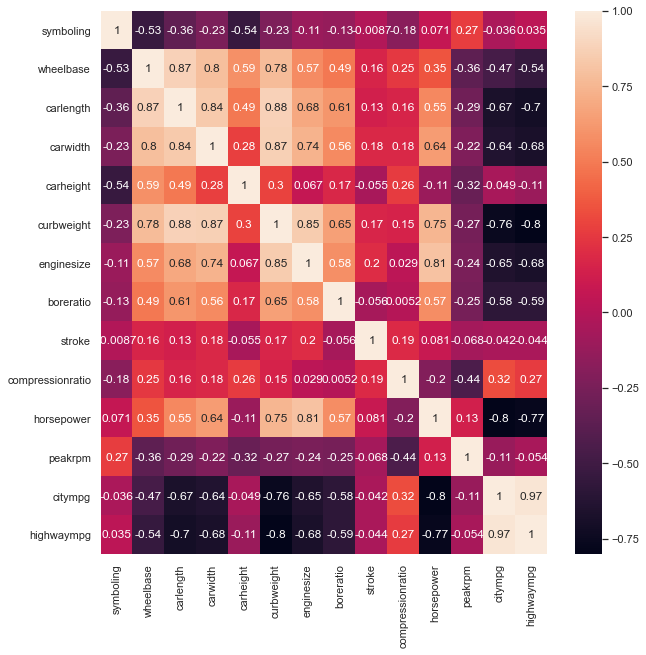

In [27]:
## correcation matrix for numerical features excluding price
corr = x_num.corr()
plt.figure (figsize = (10,10))
sns.heatmap(corr, annot = True)

<AxesSubplot:>

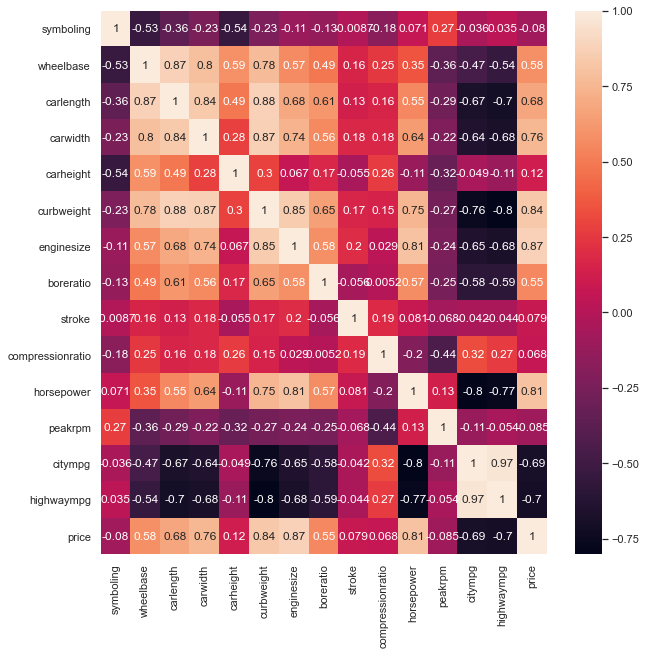

In [28]:
## correlation matrix for numerical feature including price
plt.figure (figsize = (10,10))
sns.heatmap(pd.concat([x_num,Y], axis =1).corr(),annot = True)

In [29]:
num_features = pd.concat([x_num,Y], axis =1).corr()['price'].abs().sort_values(ascending= False)[1:]

## abs() return the absolute value of a number, i.e., it will remove the negative sign of the number.
## [1:] except one row i.e. price print everything

In [30]:
num_features

enginesize          0.874145
curbweight          0.835305
horsepower          0.808139
carwidth            0.759325
highwaympg          0.697599
citympg             0.685751
carlength           0.682920
wheelbase           0.577816
boreratio           0.553173
carheight           0.119336
peakrpm             0.085267
symboling           0.079978
stroke              0.079443
compressionratio    0.067984
Name: price, dtype: float64

In [31]:
## selecting features that have correlation greater than 0.5 with price
num_selected_features = num_features[num_features>0.5]

In [32]:
num_selected_features

enginesize    0.874145
curbweight    0.835305
horsepower    0.808139
carwidth      0.759325
highwaympg    0.697599
citympg       0.685751
carlength     0.682920
wheelbase     0.577816
boreratio     0.553173
Name: price, dtype: float64

In [33]:
## defining rmse function
def rmse(y_true,y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [34]:
def rmse_val(estimator,x,y):
    y_pred = estimator.predict(x)
    rmse_ = np.sqrt(mean_squared_error(y,y_pred))
    return rmse_

## estimator = an object that fits a model based on some training data and is capable of inferring some properties on new data. 
## It can be, for instance, a classifier or a regressor. All estimators implement the fit method: estimator. fit(X, y)

### Building base model on numerical features

In [35]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import *
from sklearn.metrics import *
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import *

In [36]:
x = data[num_selected_features.index]

In [37]:
x_train,x_test,y_train,y_test = train_test_split(x,Y,test_size=0.1,random_state =1)

Train RMSE : 3450.401285 
Test RMSE : 2511.381492 
Cross Val Score  mean:3617.7460567579787 std: 375.3796291713263


<AxesSubplot:>

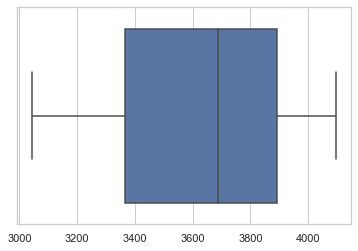

In [38]:
model = LinearRegression()
model.fit(x_train,y_train)
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

rmse_train = rmse(y_train,y_train_pred)
rmse_test = rmse(y_test,y_test_pred)

print(f'Train RMSE : {rmse_train:1f} ')
print(f'Test RMSE : {rmse_test:1f} ')

val_score = cross_val_score(model,x_train,y_train,scoring = rmse_val,cv=5)
print(f'Cross Val Score  mean:{np.mean(val_score)} std: {np.std(val_score)}')
sns.boxplot(np.array(val_score))


In [39]:
x_cat

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi
5,audi,gas,std,two,sedan,fwd,front,ohc,five,mpfi
6,audi,gas,std,four,sedan,fwd,front,ohc,five,mpfi
7,audi,gas,std,four,wagon,fwd,front,ohc,five,mpfi
8,audi,gas,turbo,four,sedan,fwd,front,ohc,five,mpfi
9,audi,gas,turbo,two,hatchback,4wd,front,ohc,five,mpfi


In [40]:
## in x_cat cylindernumber is categorical, converting it into numerical
x_cat['cylindernumber'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [41]:
cylinder = {}
cylinder['two'] = 2
cylinder['three'] = 3
cylinder['four'] = 4
cylinder['five'] = 5
cylinder['six'] = 6
cylinder['eight'] = 8
cylinder['twelve'] = 12

In [42]:
cylinders = data['cylindernumber'].apply(lambda x : cylinder[x])

In [43]:
## in x_cat doornumber is categorical, converting it into numerical
doors = data['doornumber'].apply(lambda x : 2 if x == 'two' else 4)

In [44]:
x_new = x_num.copy(deep=True)
x_new['cylindernumber'] = cylinders
x_new['doors'] = doors

### Building a model with more new numerical features

Train : 3077.919947 
Test : 2343.731639 
Cross Val Score  mean:3562.8395022286713 std: 598.3543847819585


<AxesSubplot:>

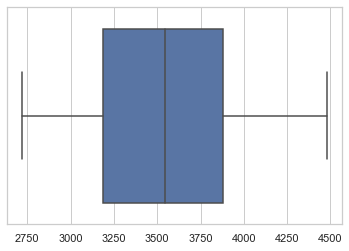

In [45]:
x_train,x_test,y_train,y_test = train_test_split(x_new,Y,test_size=0.1,random_state =1)
model = LinearRegression()
model.fit(x_train,y_train)
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

rmse_train = rmse(y_train,y_train_pred)
rmse_test = rmse(y_test,y_test_pred)

print(f'Train : {rmse_train:1f} ')
print(f'Test : {rmse_test:1f} ')

val_score = cross_val_score(model,x_train,y_train,scoring = rmse_val,cv=5)
print(f'Cross Val Score  mean:{np.mean(val_score)} std: {np.std(val_score)}')
sns.boxplot(np.array(val_score))

<AxesSubplot:xlabel='price', ylabel='Density'>

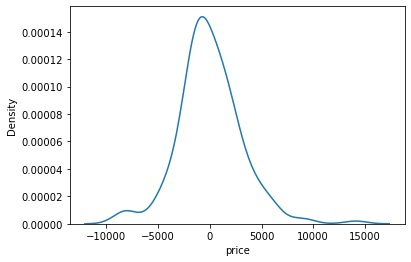

In [376]:
sns.kdeplot((y_train-y_train_pred))

In [46]:
x_cat.drop(['doornumber','cylindernumber'],axis=1, inplace = True)

In [47]:
x_dummies = pd.get_dummies(x_cat,drop_first=True)

Train : 1533.259641 
Test : 2599.467816 
Cross Val Score  mean:2372.605039257231 std: 293.9375146752511


<AxesSubplot:>

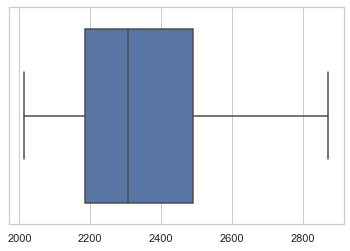

In [48]:
x_train,x_test,y_train,y_test = train_test_split(pd.concat([x_new, x_dummies],axis=1),Y,test_size=0.1,random_state =1)
model = Lasso(alpha=1)
model.fit(x_train,y_train)
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

rmse_train = rmse(y_train,y_train_pred)
rmse_test = rmse(y_test,y_test_pred)

print(f'Train : {rmse_train:1f} ')
print(f'Test : {rmse_test:1f} ')

val_score = cross_val_score(model,x_train,y_train,scoring = rmse_val,cv=5)
print(f'Cross Val Score  mean:{np.mean(val_score)} std: {np.std(val_score)}')
sns.boxplot(np.array(val_score))


Text(0, 0.5, 'Predicted')

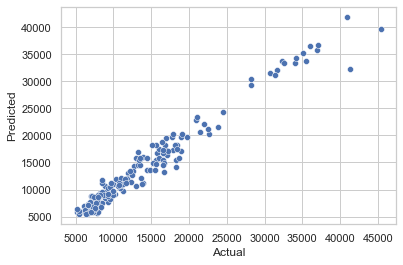

In [49]:
sns.scatterplot(y_train,y_train_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [50]:
reg_val   = np.where(Y < 38000)

In [51]:
x_new = pd.concat([x_new,x_dummies],axis=1)

In [52]:
x_new = x_new[x_new.index.isin(reg_val[0])]

In [53]:
Y_NEW = Y[reg_val[0]]

Train : 1218.307181 
Test : 1495.124483 
Cross Val Score  mean:2208.2092624846223 std: 238.99631934716186


<AxesSubplot:>

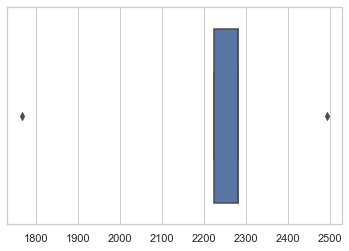

In [54]:
x_train,x_test,y_train,y_test = train_test_split(x_new,Y_NEW,test_size=0.1,random_state =1)
model = LinearRegression()
model.fit(x_train,y_train)
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

rmse_train = rmse(y_train,y_train_pred)
rmse_test = rmse(y_test,y_test_pred)

print(f'Train : {rmse_train:1f} ')
print(f'Test : {rmse_test:1f} ')

val_score = cross_val_score(model,x_train,y_train,scoring = rmse_val,cv=5)
print(f'Cross Val Score  mean:{np.mean(val_score)} std: {np.std(val_score)}')
sns.boxplot(np.array(val_score))

Text(0, 0.5, 'Predicted')

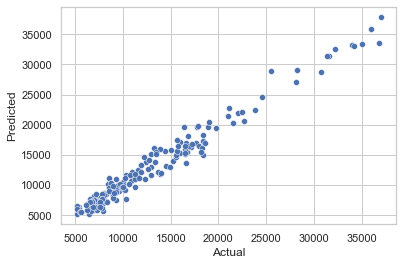

In [55]:
sns.scatterplot(y_train,y_train_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<AxesSubplot:xlabel='price', ylabel='price'>

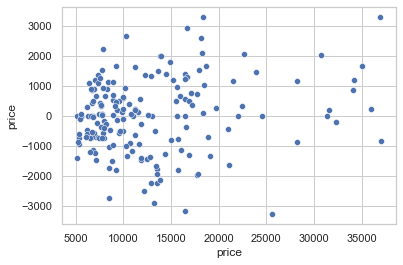

In [56]:
sns.scatterplot(y_train,(y_train-y_train_pred)) ## error plot. it should have no shape.

<AxesSubplot:xlabel='price', ylabel='Density'>

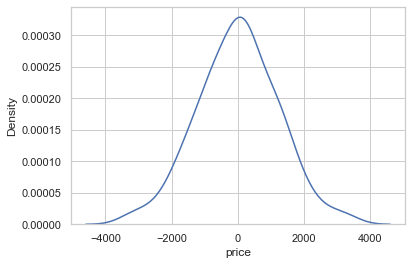

In [57]:
sns.kdeplot((y_train-y_train_pred))

Train : 1235.724278 
Test : 1473.102484 
Cross Val Score  mean:2119.7943195886987 std: 259.7929803379968


<AxesSubplot:>

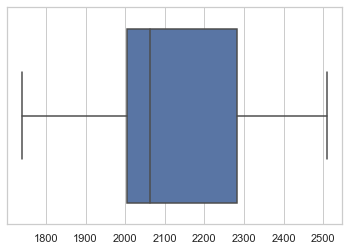

In [58]:
x_train,x_test,y_train,y_test = train_test_split(x_new,Y_NEW,test_size=0.1,random_state =1)
model = Lasso(alpha=1.3)
model.fit(x_train,y_train)
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

rmse_train = rmse(y_train,y_train_pred)
rmse_test = rmse(y_test,y_test_pred)

print(f'Train : {rmse_train:1f} ')
print(f'Test : {rmse_test:1f} ')

val_score = cross_val_score(model,x_train,y_train,scoring = rmse_val,cv=5)
print(f'Cross Val Score  mean:{np.mean(val_score)} std: {np.std(val_score)}')
sns.boxplot(np.array(val_score))


In [59]:
x_new = x_new[x_new.columns[model.coef_!=0]]

Train : 1229.057965 
Test : 1492.739546 
Cross Val Score  mean:2110.1289400683504 std: 252.0166355590935


<AxesSubplot:>

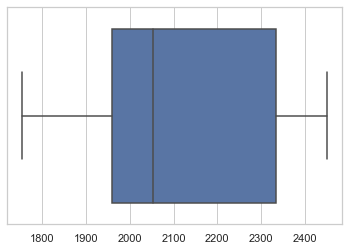

In [60]:
x_train,x_test,y_train,y_test = train_test_split(x_new,Y_NEW,test_size=0.1,random_state =1)
model = make_pipeline(StandardScaler(),Lasso(alpha=1.2))
model.fit(x_train,y_train)
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

rmse_train = rmse(y_train,y_train_pred)
rmse_test = rmse(y_test,y_test_pred)

print(f'Train : {rmse_train:1f} ')
print(f'Test : {rmse_test:1f} ')

val_score = cross_val_score(model,x_train,y_train,scoring = rmse_val,cv=5)
print(f'Cross Val Score  mean:{np.mean(val_score)} std: {np.std(val_score)}')
sns.boxplot(np.array(val_score))



### Model Equation

In [61]:
b0 = model['lasso'].intercept_

eqn = f'price = {round(b0,2)}'
for f,c in zip(x_new.columns,model['lasso'].coef_):
    eqn = eqn+ f' + {round(c,2)} * {f}'

In [62]:
print(eqn)

price = 12868.34 + 105.8 * symboling + 1462.17 * wheelbase + -1312.66 * carlength + 1409.66 * carwidth + -405.35 * carheight + 2775.01 * curbweight + 1466.87 * enginesize + -495.31 * boreratio + -299.8 * stroke + -1197.29 * compressionratio + 0.0 * horsepower + 713.87 * peakrpm + -151.52 * citympg + 572.76 * highwaympg + 376.17 * cylindernumber + 460.0 * doors + 145.45 * CarName_audi + 1300.41 * CarName_bmw + 720.03 * CarName_buick + -260.1 * CarName_chevrolet + -589.53 * CarName_dodge + -86.4 * CarName_isuzu + 377.15 * CarName_jaguar + -119.69 * CarName_mercury + -778.42 * CarName_mitsubishi + -269.84 * CarName_nissan + -2097.15 * CarName_peugeot + -519.29 * CarName_plymouth + 838.07 * CarName_porsche + -95.78 * CarName_renault + 443.93 * CarName_saab + -165.08 * CarName_subaru + -595.1 * CarName_toyota + -256.76 * CarName_volkswagen + -190.23 * CarName_volvo + -1538.13 * fueltype_gas + 748.96 * aspiration_turbo + -779.31 * carbody_hardtop + -2121.73 * carbody_hatchback + -2064.3 * ca

### Decision Tree

In [63]:
from sklearn.tree import *
from sklearn.model_selection import GridSearchCV,cross_val_score

In [64]:
model = DecisionTreeRegressor()
model.fit(x_train,y_train)

rmse = np.sqrt(mean_squared_error(y_train,model.predict(x_train)))
print(f'Train RMSE:{rmse}')
rmse = np.sqrt(mean_squared_error(y_test,model.predict(x_test)))
print(f'Test RMSE:{rmse}')

Train RMSE:202.51126426620357
Test RMSE:1624.3067568892861


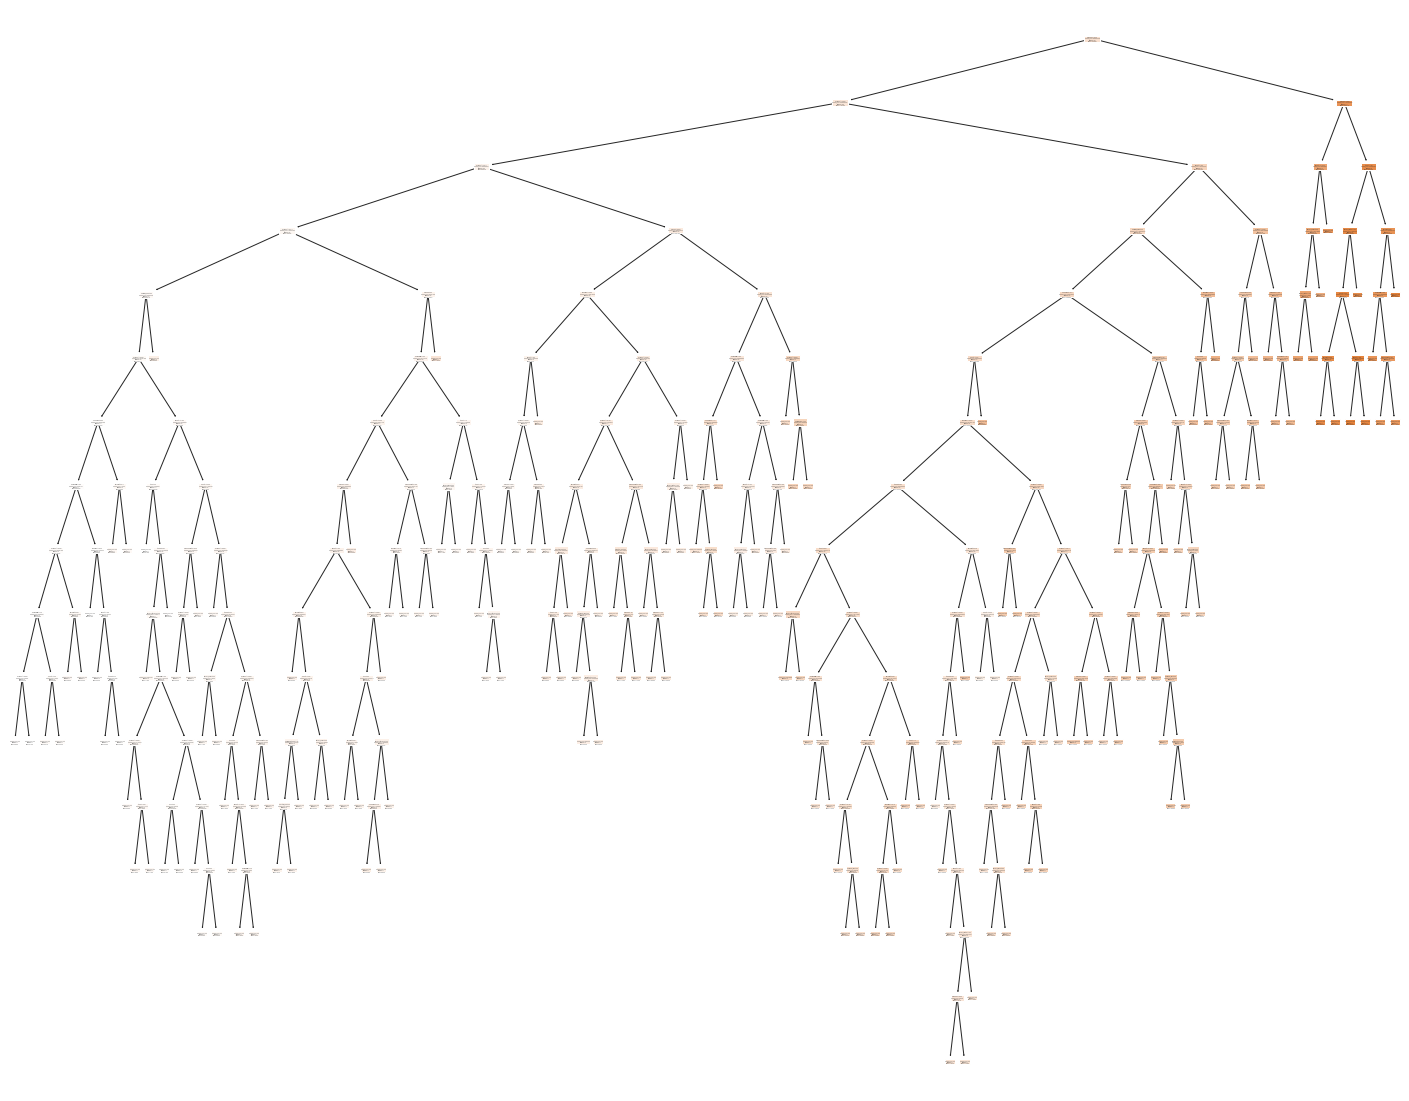

In [65]:
fig = plt.figure(figsize=(25,20))
_ = plot_tree(model, 
                   feature_names=x_train.columns,  
                   filled=True)
fig.savefig('sample.jpeg')

In [66]:
model.get_depth()

16

In [67]:
params= {}
params['max_depth'] = [3,5,7,9,11]
params['min_samples_split'] = [3,5,7,9]
params['criterion'] = ['squared_error','friedman_mse']

In [68]:
grid_model = GridSearchCV(DecisionTreeRegressor(),param_grid=params,cv=5,scoring='neg_mean_squared_error',verbose=1)

In [69]:
grid_model.fit(x_train,y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse'],
                         'max_depth': [3, 5, 7, 9, 11],
                         'min_samples_split': [3, 5, 7, 9]},
             scoring='neg_mean_squared_error', verbose=1)

In [70]:
grid_model.best_params_

{'criterion': 'friedman_mse', 'max_depth': 7, 'min_samples_split': 9}

In [71]:
np.sqrt(-1.0*grid_model.best_score_)

2305.5187212317533

Train RMSE:1349.0260173924942
Test RMSE:1621.0277594143301
Cross Val Score  mean:2586.4515949797305 std: 463.4147718837469


<AxesSubplot:>

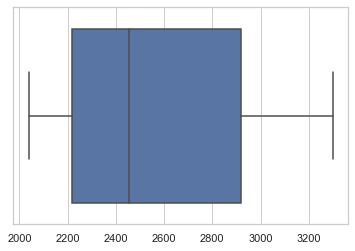

In [73]:
y_train_pred = grid_model.predict(x_train)
y_test_pred = grid_model.predict(x_test)

rmse = np.sqrt(mean_squared_error(y_train,y_train_pred))
print(f'Train RMSE:{rmse}')
rmse = np.sqrt(mean_squared_error(y_test,y_test_pred))
print(f'Test RMSE:{rmse}')

val_score = cross_val_score(model,x_train,y_train,scoring = rmse_val,cv=5)
print(f'Cross Val Score  mean:{np.mean(val_score)} std: {np.std(val_score)}')
sns.boxplot(np.array(val_score))

In [74]:
feature_importance= pd.DataFrame(zip(x_train.columns,grid_model.best_estimator_.feature_importances_),columns=['Features','Importance'])

In [75]:
feature_importance.sort_values('Importance',ascending=False, inplace = True)

In [76]:
feature_importance.reset_index(inplace = True, drop=True)

In [77]:
feature_importance

,Features,Importance
0,enginesize,0.611348
1,curbweight,0.290994
2,horsepower,0.022325
3,carwidth,0.020890
4,CarName_bmw,0.017423
5,wheelbase,0.008701
6,boreratio,0.007432
7,peakrpm,0.006934
8,carlength,0.004978
9,highwaympg,0.003630


In [78]:
feature_importance = feature_importance[feature_importance['Importance']!=0]

In [79]:
feature_importance

,Features,Importance
0,enginesize,0.611348
1,curbweight,0.290994
2,horsepower,0.022325
3,carwidth,0.020890
4,CarName_bmw,0.017423
5,wheelbase,0.008701
6,boreratio,0.007432
7,peakrpm,0.006934
8,carlength,0.004978
9,highwaympg,0.003630


In [80]:
x_train_ = x_train[feature_importance.Features]
x_test_ = x_test[feature_importance.Features]

In [81]:
x_train_.shape

(181, 14)

In [82]:
y_train.shape

(181,)

In [83]:
params_= {}
params_['max_depth'] = [3,5,7,9,11]
params_['min_samples_split'] = [3,5,7,9,11]
params_['criterion'] = ['squared_error','friedman_mse']

In [84]:
grid_model = GridSearchCV(DecisionTreeRegressor(),param_grid=params_,cv=5,scoring='neg_mean_squared_error',verbose=1)
grid_model.fit(x_train_,y_train)

y_train_pred = grid_model.predict(x_train_)
y_test_pred = grid_model.predict(x_test_)

rmse = np.sqrt(mean_squared_error(y_train,y_train_pred))
print(f'Train RMSE:{rmse}')
rmse = np.sqrt(mean_squared_error(y_test,y_test_pred))
print(f'Test RMSE:{rmse}')


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Train RMSE:1109.7389905392906
Test RMSE:1463.7640225964399


In [85]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(grid_model, x_train_,y_train,cv=5,scoring = 'neg_mean_squared_error')

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits


In [86]:
np.sqrt(np.abs(np.mean(score)))

2281.774344599556

In [87]:
np.sqrt(np.abs(grid_model.best_score_))

2295.6636220998525